In [2]:
import numpy as np
import psana
import matplotlib.pyplot as plt
import h5py

from utils import *
from constants import *
from scipy.signal import find_peaks, peak_widths





2670


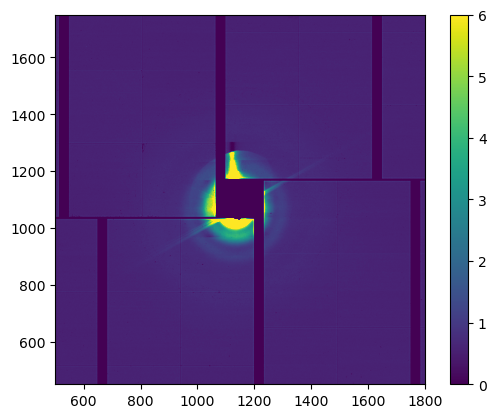

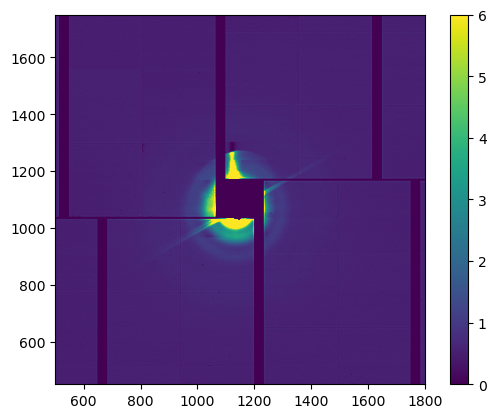

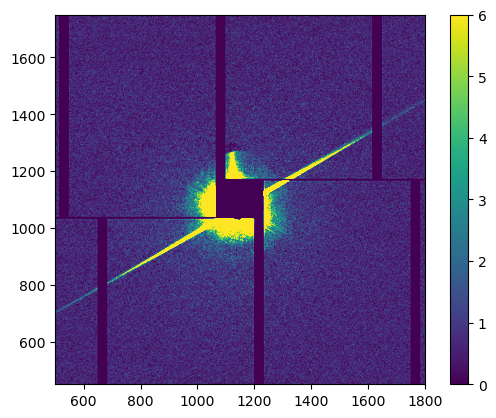

In [5]:
xy1 = get_run_assem_intens_filt_mean(32)
xy2 = get_run_assem_mean(32)
xy3 = get_run_assem_high_intens_filt_mean(32)


with h5py.File(f'{H5_FOLDER}/intens_filt/r0027_proc_high_intens_filt.h5') as f:
    run_intens = f['/run_intens'][:]
    run_mean = f['/run_mean'][:]


print(len(run_intens))

plt.figure()
plt.imshow(xy1, vmin=0, vmax=6)
plt.colorbar()
assem_plot_zoom()
plt.figure()
plt.imshow(xy2, vmin=0, vmax=6)
plt.colorbar()
assem_plot_zoom()
plt.figure()
plt.imshow(xy3, vmin=0, vmax=6)
plt.colorbar()
assem_plot_zoom()

27
28
29
30
31
32
35
36
37
39
41
43
44
45
46
47
52
53


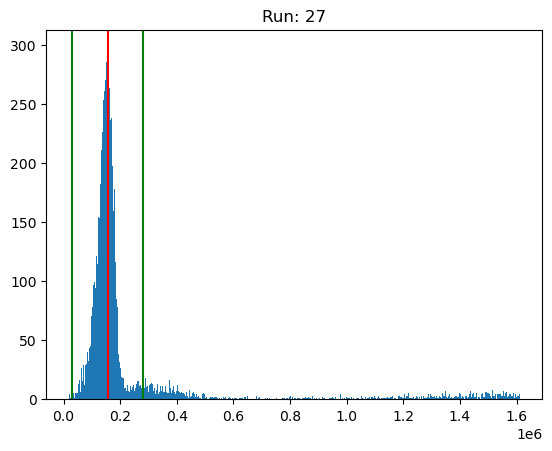

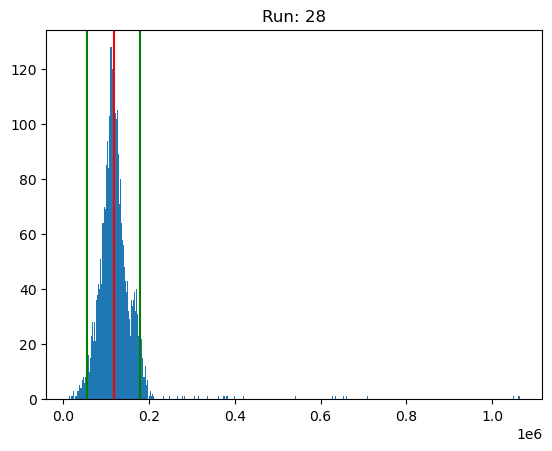

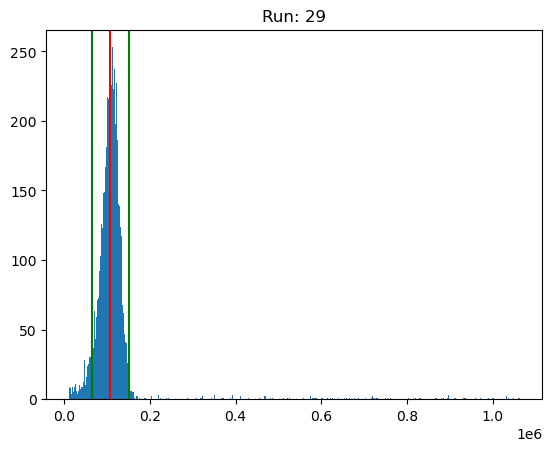

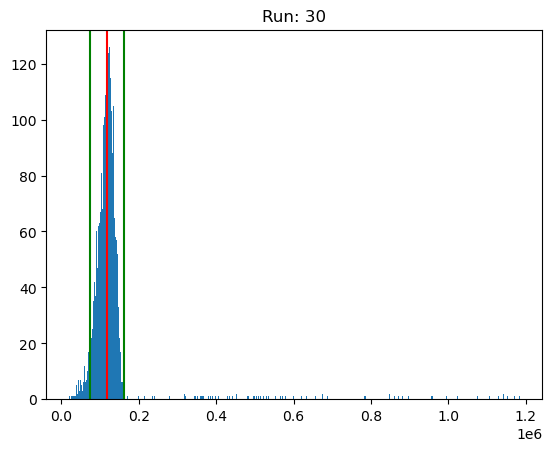

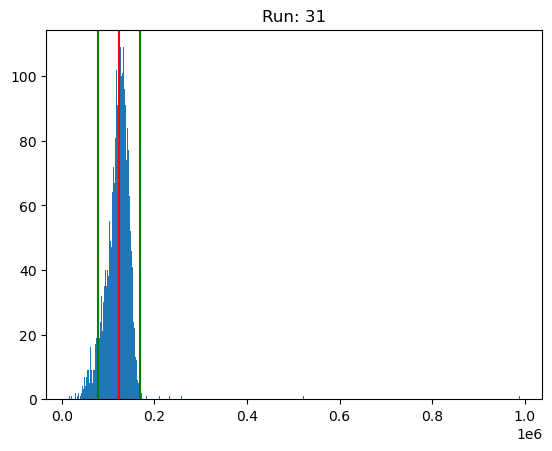

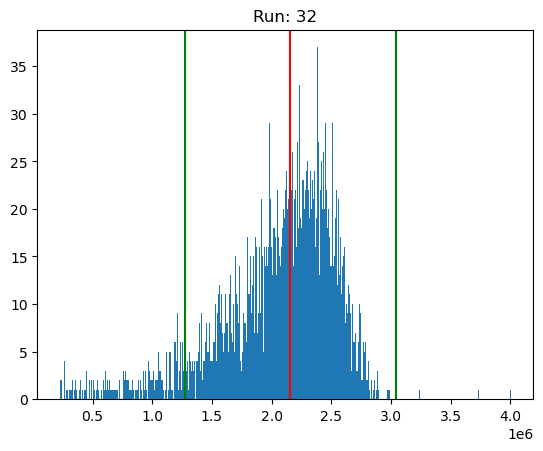

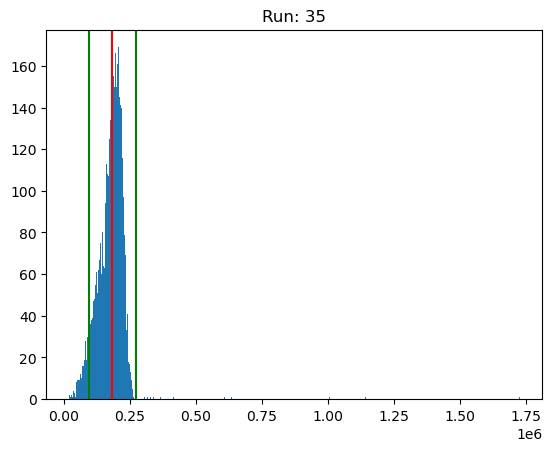

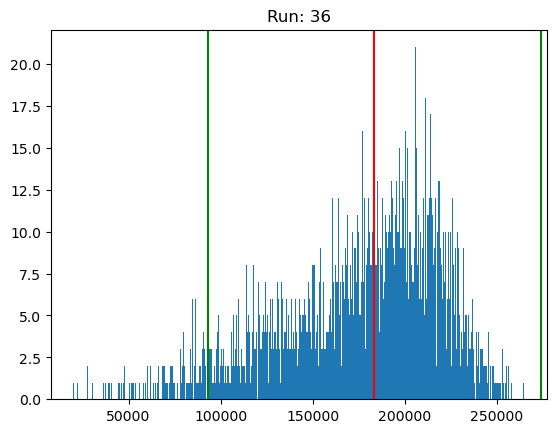

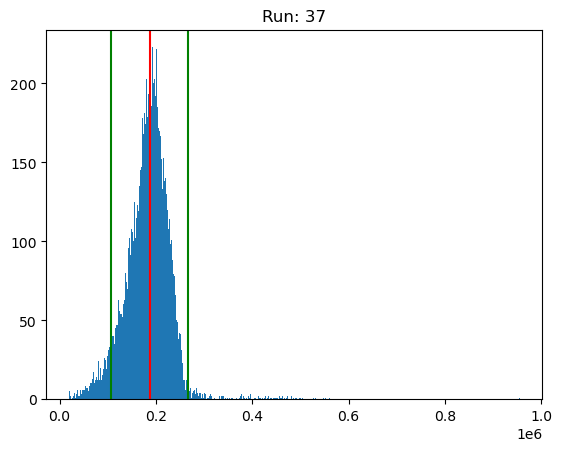

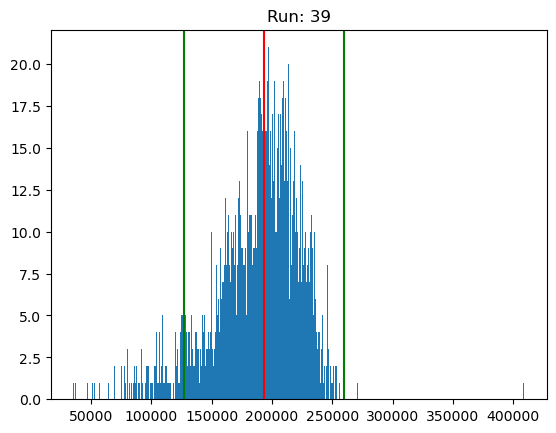

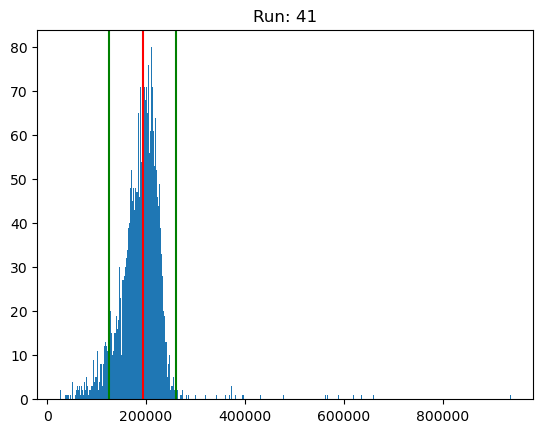

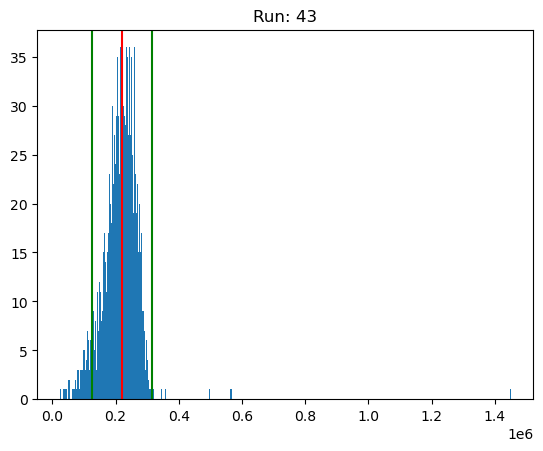

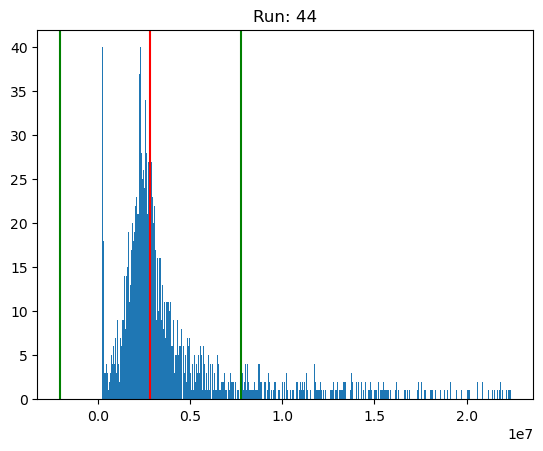

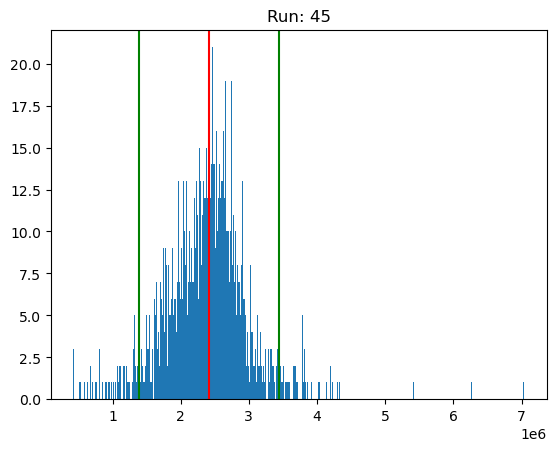

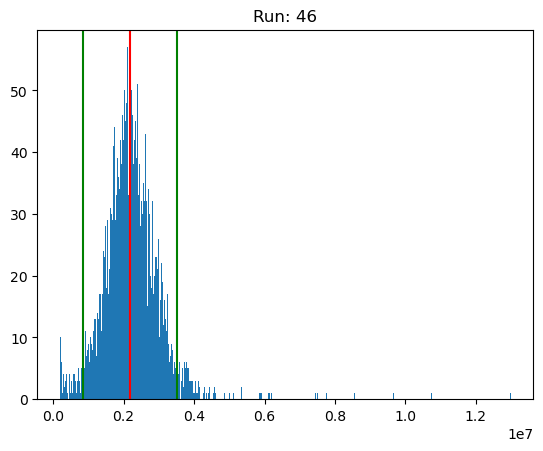

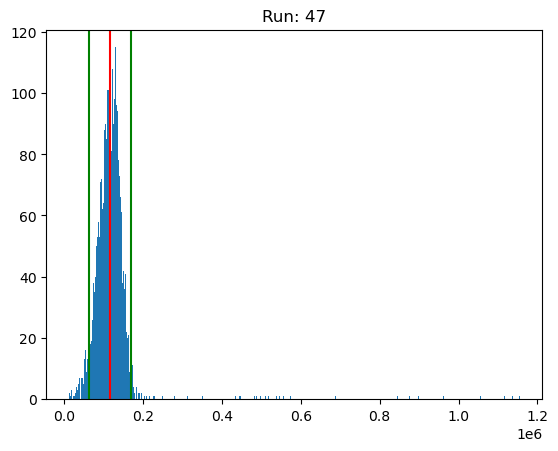

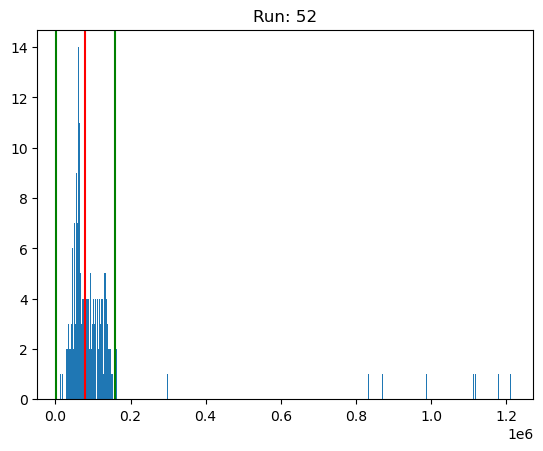

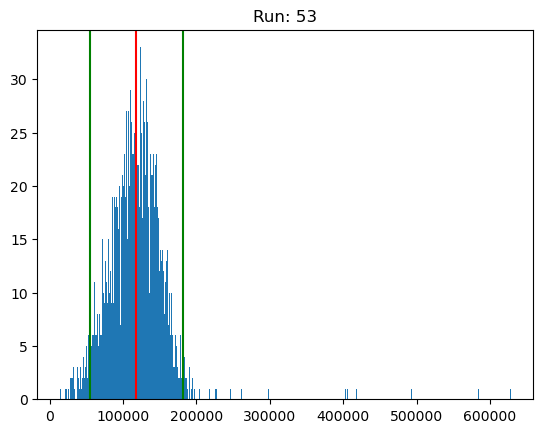

In [50]:
darks = [16,18,19,23,42,55]
junk = [33, 34, 38, 40]
gold_buff = [48, 49, 50, 51]

for run in range(27, 54):
    if run in darks: continue
    if run in junk: continue
    if run in gold_buff: continue

    print(run)
    
    timestamps, run_intens = get_run_intens(run)

    med = np.median(run_intens)
    
    loc = np.where(run_intens < 10*med)
    timestamps, run_intens = timestamps[loc], run_intens[loc]

    loc = np.where(run_intens > med/10)
    timestamps, run_intens = timestamps[loc], run_intens[loc]
    
    p16 = np.percentile(run_intens, 16)
    p84 = np.percentile(run_intens, 84)
    wid = p84 - p16
    
    #peaks, properties = find_peaks(hist, height=0.9, prominence=1)

    #wid = 1e5
    plt.figure()
    plt.title(f'Run: {run}')
    hist , bins, _= plt.hist(run_intens, bins=500)

    plt.axvline(x=med, ymin=0, ymax=np.max(hist), color='r')
    plt.axvline(x=med+wid, ymin=0, ymax=np.max(hist), color='g')
    plt.axvline(x=med-wid, ymin=0, ymax=np.max(hist), color='g')
    
   
   